<a href="https://colab.research.google.com/github/anishisgitting010709/Latest_stock_price_model/blob/main/Latest_stock_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "^NSEI"
data = yf.download(stock, start, end)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2007-09-17,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0


In [3]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
count,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4.234000e+03
mean,10098.719487,10098.719487,10159.842421,10034.790334,10105.213239,2.052077e+05
std,5536.743234,5536.743234,5555.075709,5516.763134,5540.090388,2.085142e+05
min,2524.199951,2524.199951,2585.300049,2252.750000,2553.600098,0.000000e+00
25%,5589.087646,5589.087646,5635.875000,5553.237671,5597.625000,0.000000e+00
50%,8459.300293,8459.300293,8502.674805,8398.375000,8450.649902,1.792000e+05
75%,12088.087402,12088.087402,12151.574951,12034.649902,12117.975098,2.859750e+05
max,26216.050781,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


Text(0.5, 1.0, 'Closing price of the Stock/index selected')

<Figure size 1500x500 with 0 Axes>

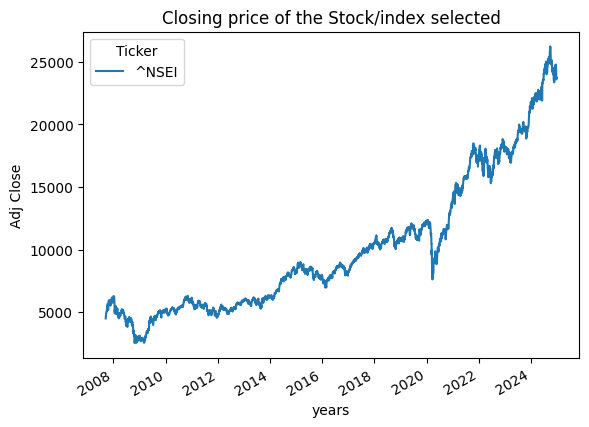

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15,5))
data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of the Stock/index selected")

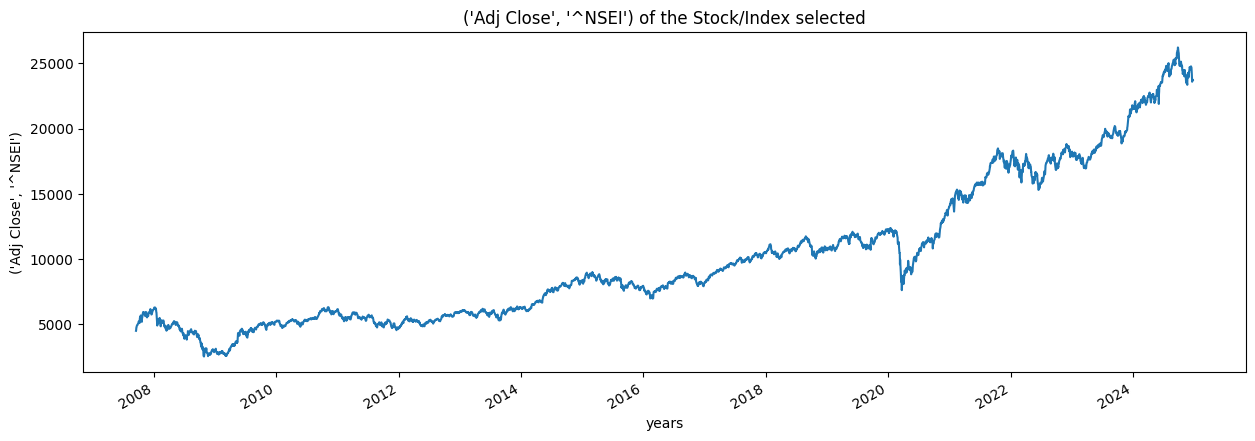

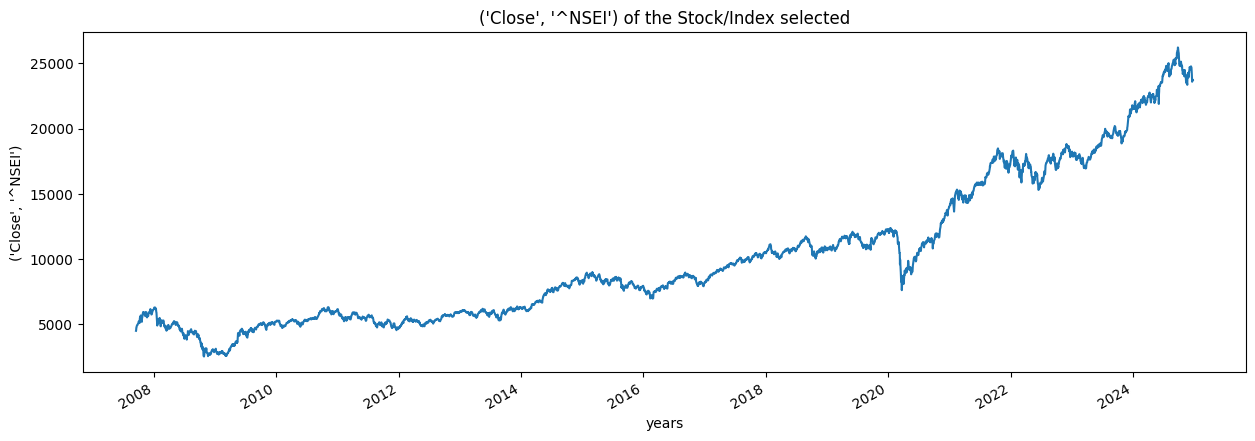

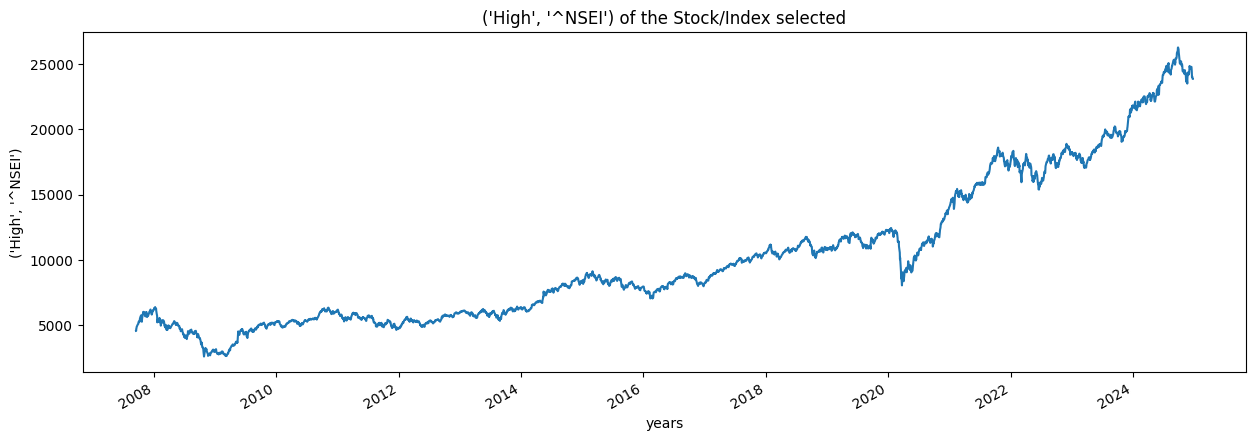

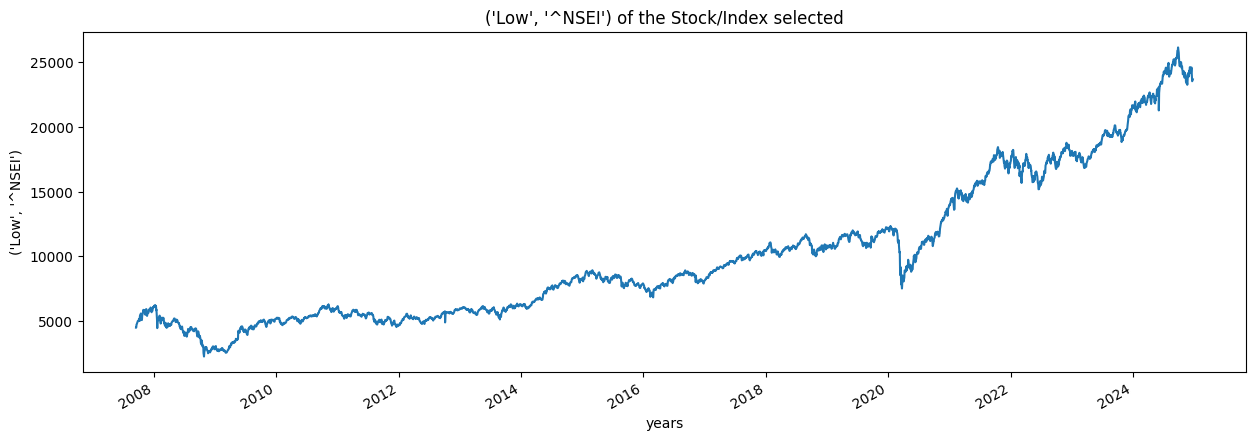

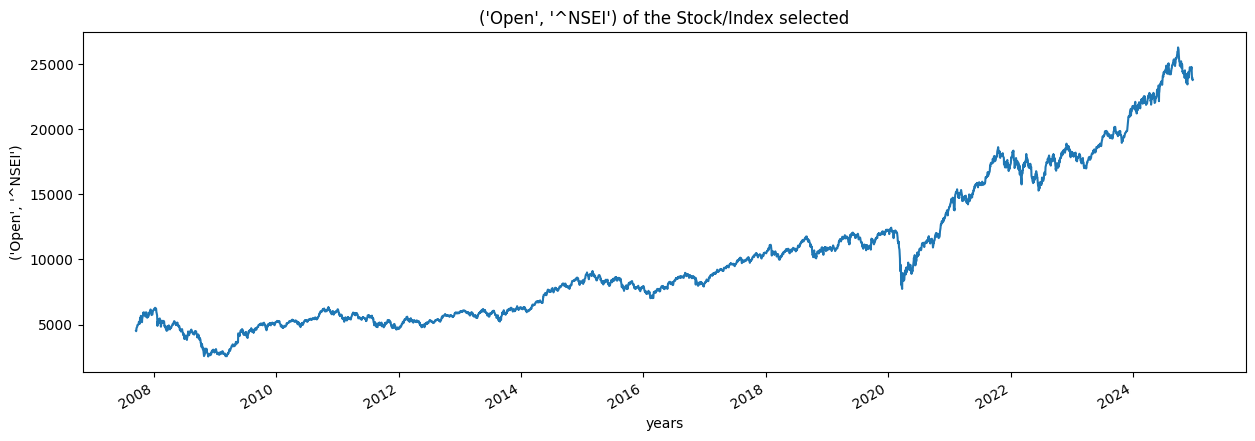

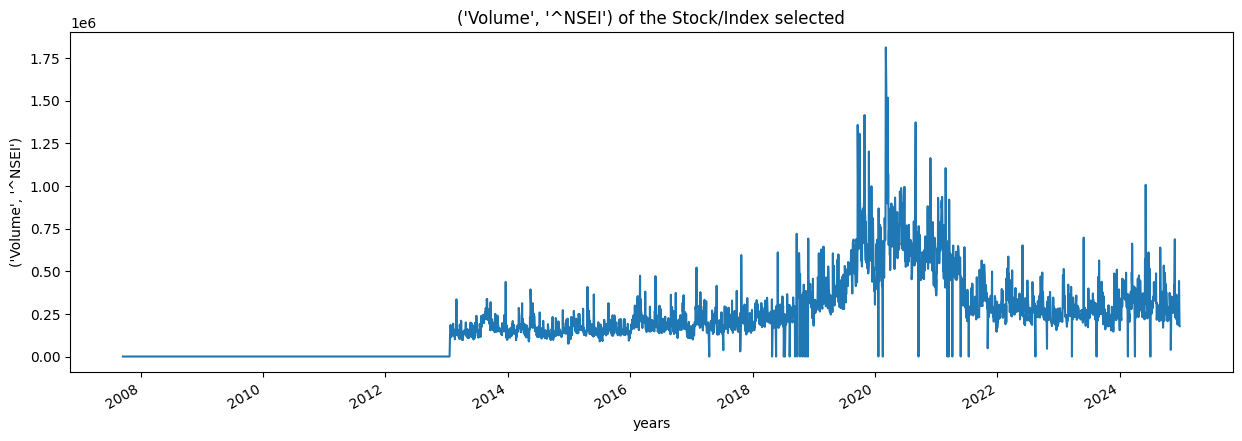

In [5]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of the Stock/Index selected")

data.columns

for column in data.columns:
    plot_graph((15,5),data[column], column)

In [6]:
for i in range(2004,2025):
    print(i,list(data.index.year).count(i))

2004 0
2005 0
2006 0
2007 72
2008 245
2009 241
2010 250
2011 242
2012 242
2013 247
2014 240
2015 244
2016 244
2017 248
2018 245
2019 241
2020 250
2021 248
2022 248
2023 245
2024 242


In [7]:
data['MA_for_250_days'] = data['Adj Close'].ewm(span=250, adjust=False).mean()
data['MA_for_250_days']

,MA_for_250_days
Date,
2007-09-17,4494.649902
2007-09-18,4495.060662
2007-09-19,4496.951414
2007-09-20,4498.948214
2007-09-21,4501.646235
...,...
2024-12-18,23293.596452
2024-12-19,23298.840298
2024-12-20,23301.140376


<Figure size 640x480 with 0 Axes>

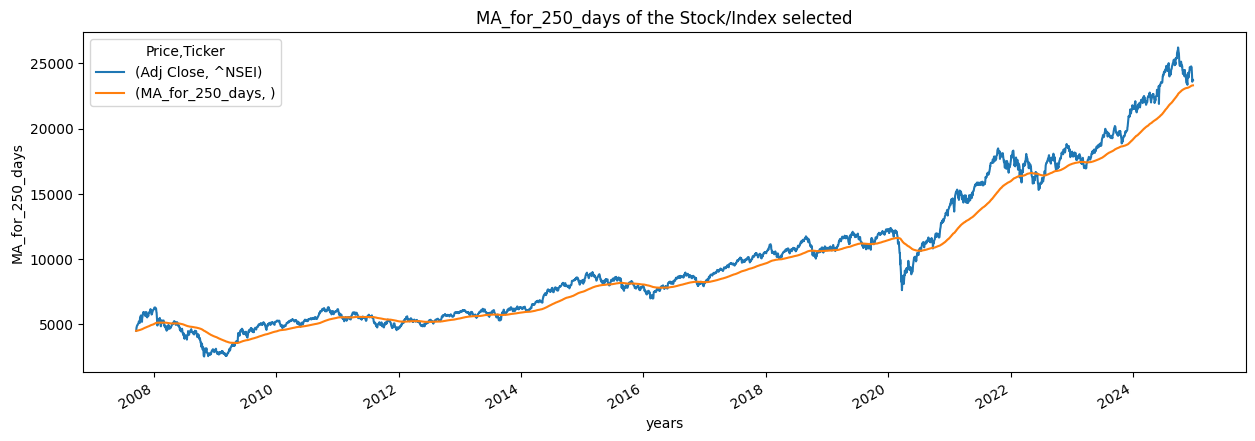

<Figure size 640x480 with 0 Axes>

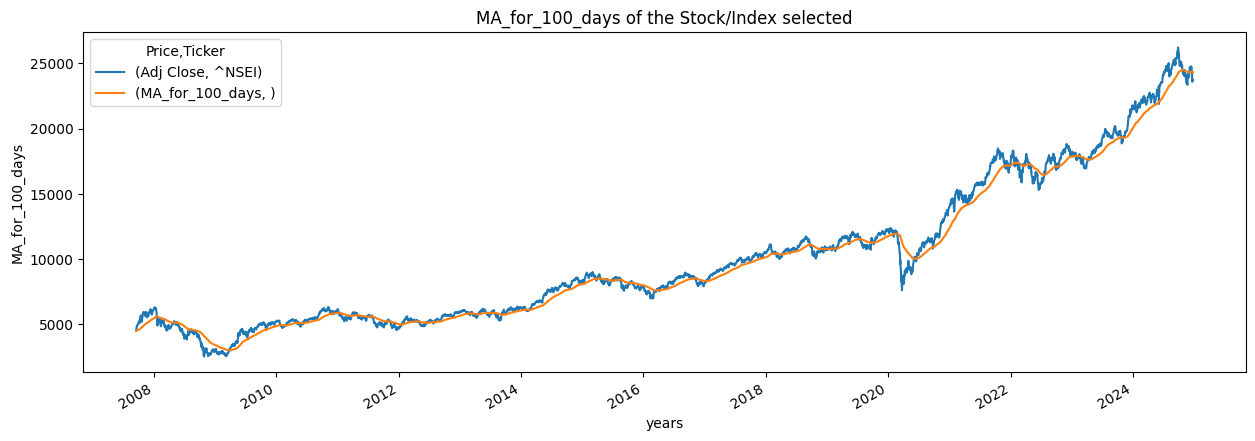

<Figure size 640x480 with 0 Axes>

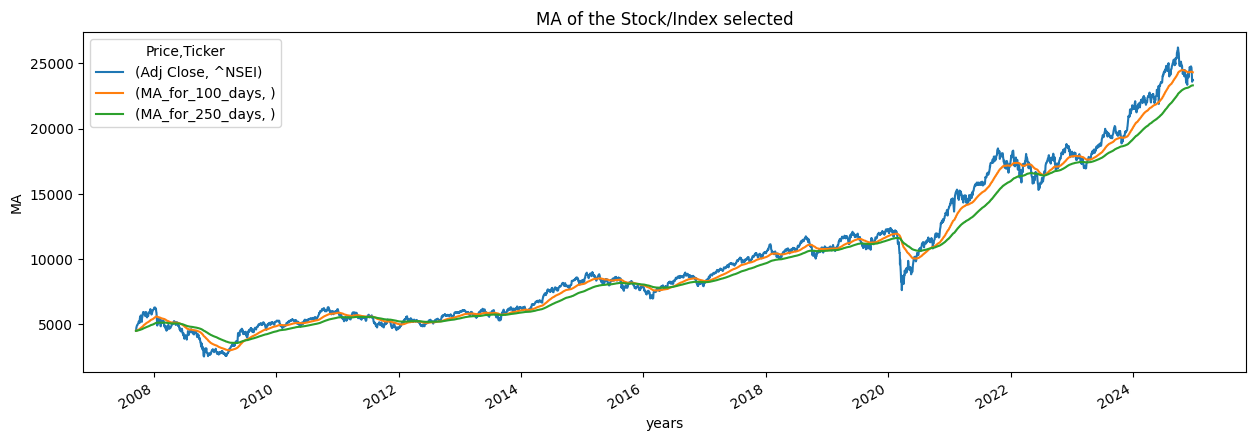

In [8]:
plot_graph((15,5), data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')
data['MA_for_100_days'] = data['Adj Close'].ewm(span=100, adjust=False).mean()
data['MA_for_100_days']
plot_graph((15,5), data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')
plot_graph((15,5), data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

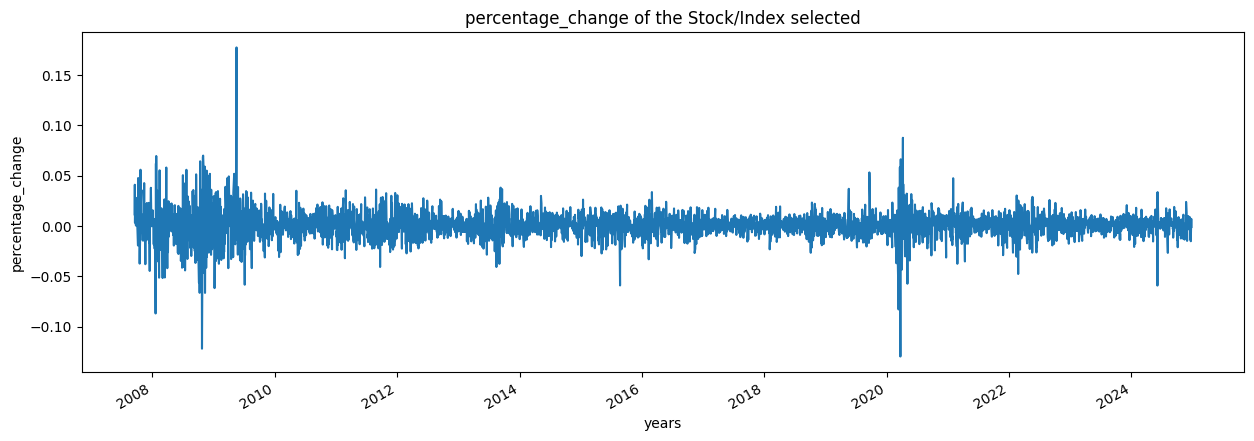

In [9]:
data['percentage_change_cp'] = data['Adj Close'].pct_change()
data[['Adj Close','percentage_change_cp']].head()
plot_graph((15,5), data['percentage_change_cp'], 'percentage_change')

In [11]:
Adj_close_price = data[['Adj Close']]
max(Adj_close_price.values),min(Adj_close_price.values)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.08316995],
       [0.08534581],
       [0.09320294],
       ...,
       [0.88905254],
       [0.89605702],
       [0.89496809]])

In [12]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2893, 100, 1)
(2893, 1)
(1241, 100, 1)
(1241, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2893/2893 ━━━━━━━━━━━━━━━━━━━━ 273s 93ms/step - loss: 4.5790e-04
Epoch 2/2
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 327s 95ms/step - loss: 8.1445e-05


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step


In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[12075.787],
       [12115.498],
       [12133.109],
       ...,
       [23073.04 ],
       [22808.49 ],
       [22808.715]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[12259.70019531],
       [12271.79980469],
       [12262.75      ],
       ...,
       [23587.5       ],
       [23753.44921875],
       [23727.65039062]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

554.1719219312253

In [ ]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-12-19,12259.700195,12075.787109
2019-12-20,12271.799805,12115.498047
2019-12-23,12262.750000,12133.109375
2019-12-24,12214.549805,12129.789062
2019-12-26,12126.549805,12098.326172


<Figure size 640x480 with 0 Axes>

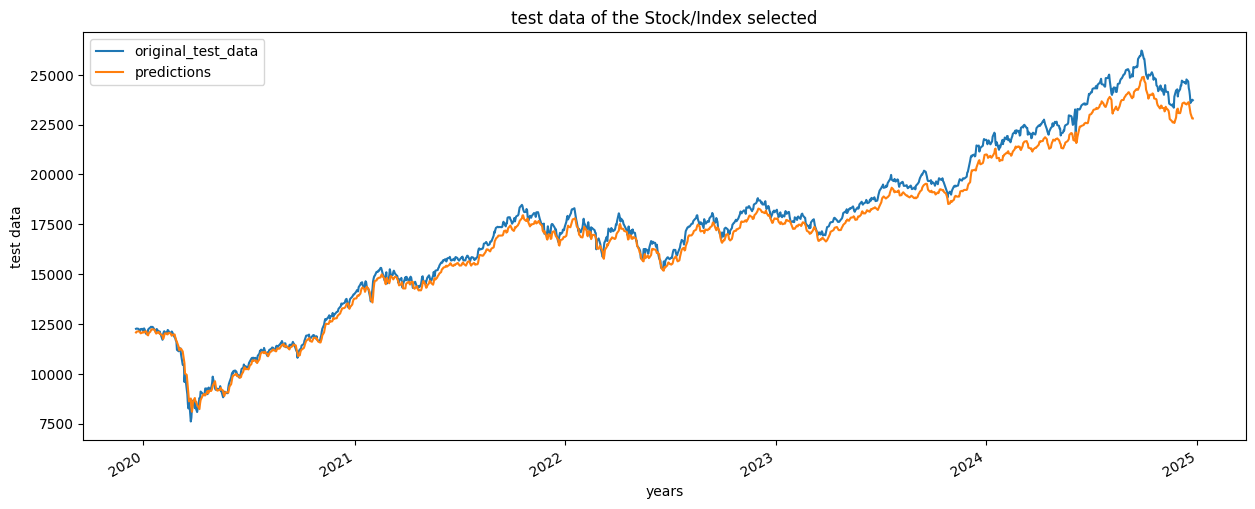

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

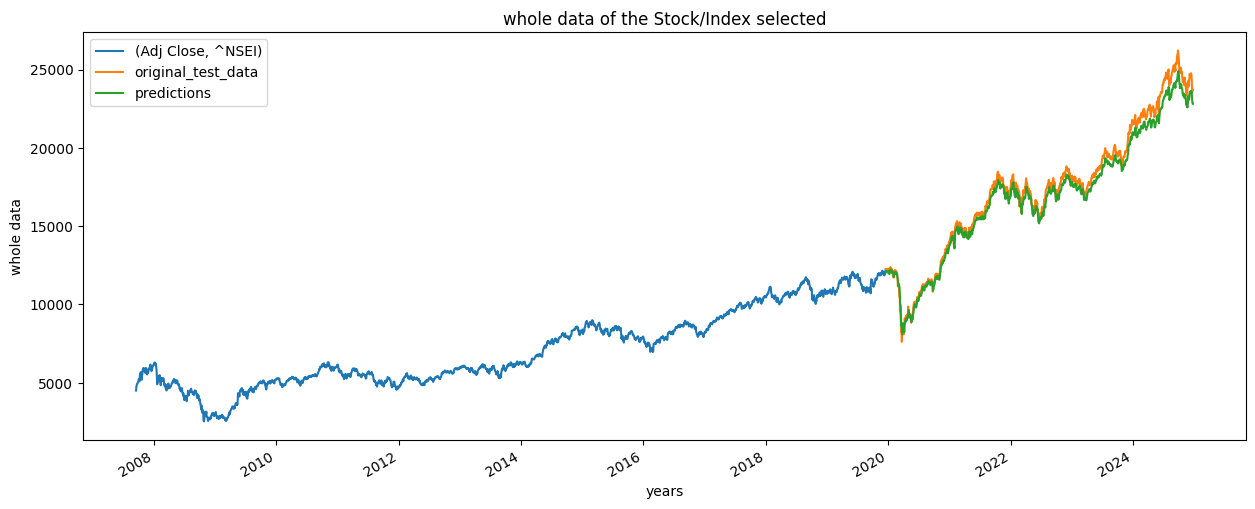

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
last_100 = data[['Close']].tail(100)
last_100_scaled = scaler.fit_transform(last_100['Close'].values.reshape(-1, 1)).reshape(1, -1, 1)

In [ ]:
def predict_future(no_of_days, prev_100):
        future_predictions = []
        for i in range(int(no_of_days)):
            next_day = model.predict(prev_100)
            prev_100 = np.append(prev_100[:, 1:, :], [[next_day[0]]], axis=1)
            future_predictions.append(float(scaler.inverse_transform(next_day)[0][0]))  # Convert to native float
        return future_predictions

In [ ]:
future_results = predict_future(5, last_100_scaled)
temp = {"future_predictions":{}}
for i in range(1,len(future_results)+1):
        temp["future_predictions"][f'day_{i}'] = str(future_results[i-1])
    # temp['future_predictions'] = future_resultsfuture_results = predict_future(num_days, last_100_scaled)
temp = {"future_predictions":{}}
for i in range(1,len(future_results)+1):
        temp["future_predictions"][f'day_{i}'] = str(future_results[i-1])
    # temp['future_predictions'] = future_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'temp' is already defined and contains your data:

# 1. Create a Pandas DataFrame from 'temp' for the table:
df = pd.DataFrame(temp['future_predictions'], index=['Prediction']).T
df.index.name = 'Day'

# 2. Create the table using Plotly:
table = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.Prediction],
               fill_color='lavender',
               align='left'))
])

# 3. Create the graph using Plotly:
fig = go.Figure(data=[go.Scatter(x=df.index, y=df.Prediction)])
fig.update_layout(title='Future Stock Price Predictions',
                  xaxis_title='Day',
                  yaxis_title='Predicted Price')

# 4. Display the table and graph:
table.show()
#fig.show()

In [ ]:
model.save("Latest_stock_price_model.keras")